##### 붓꽃(Iris) 데이터 셋을 이용한 군집(Cluster) 평가

##### silhouette_samples, silhouette_score 사용

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
iris = load_iris()
kmeans = KMeans(n_clusters=3, max_iter = 300, random_state=0)
kmeans.fit(iris.data)

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['cluster'] = kmeans.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# 150송이 꽃의 실루엣 계수 구하기
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
score_samples
iris_df['silhouette_coef'] = score_samples
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coe,silhouette_coef
0,5.1,3.5,1.4,0.2,1,0.852955,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302,0.849302
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454,0.352454


In [14]:
avg_score = np.mean(iris_df['silhouette_coef'].values)
avg_score

0.5528190123564095

In [17]:
# 군집별(gorup by) 평균(mean) 실루엣 계수(silhouette_coef)
iris_df.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coef, dtype: float64

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

In [ ]:
print("https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html")

In [18]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

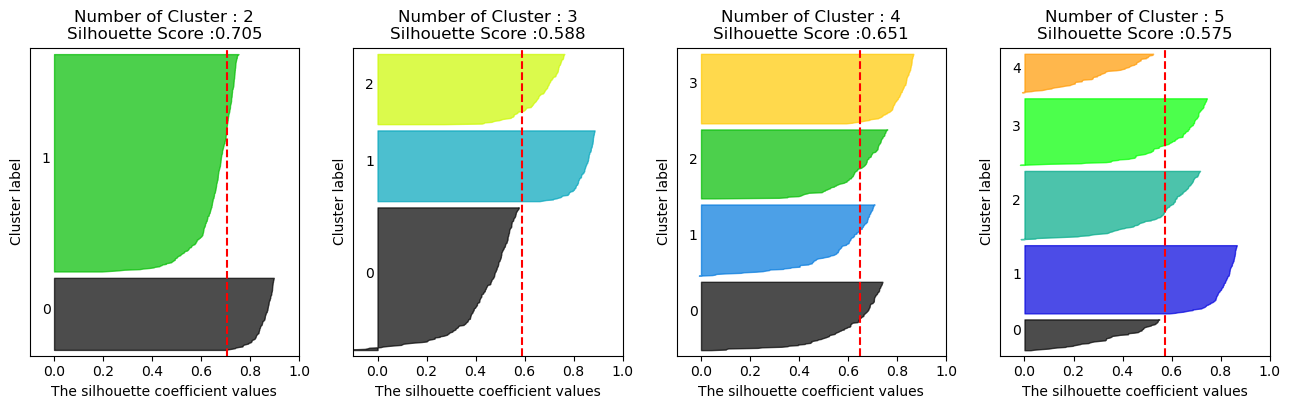

In [19]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

visualize_silhouette([2, 3, 4, 5], X)


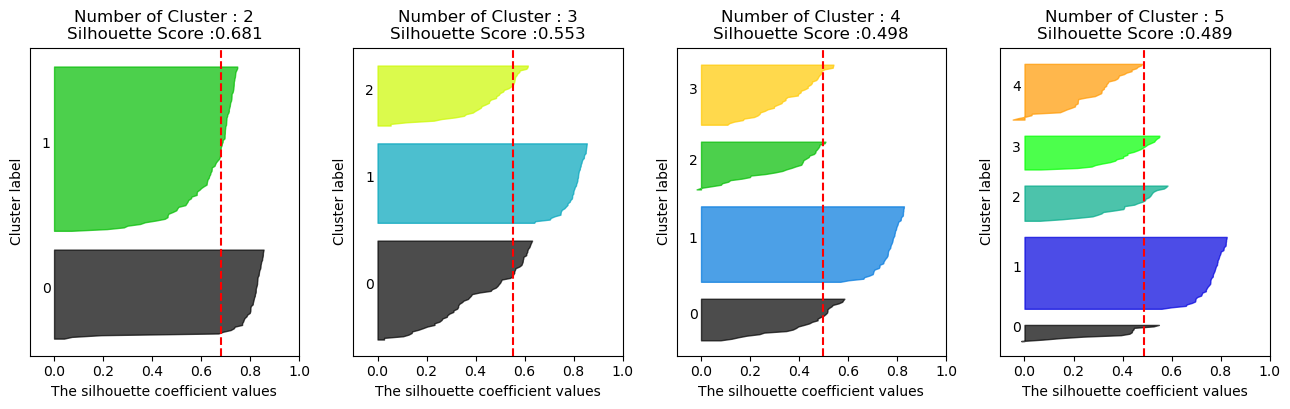

In [20]:
# 붓꽃 데이터 군집 실루엣 평가

visualize_silhouette([2, 3, 4, 5], iris.data)